# Lab 2: SLR with Bike Share Data (Python3)

In [7]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.sandbox.regression.predstd import wls_prediction_std as pi

In [8]:
data = pd.read_csv('bike_share.csv')
countData = data['count']
tempData = data['temp']
humidityData = data['humidity']
windspeedData = data['windspeed']

In [9]:
def smlModel(model, data):
    return(smf.ols(model, data=data).fit())

def scatterPlot(x, y, model, xlab):
    plt.scatter(x, y, c = "black");
    plt.xlabel(xlab);
    plt.ylabel("# Bike Rentals");
    fitted_line, = plt.plot(x, model.fittedvalues, '-', color = "red", linewidth = 2, label = "Fitted Values");
    ignore1, intervals, ignore2 = summary_table(model)
    ciLow = intervals[:,4]
    ciHigh = intervals[:,5]
    piLow = intervals[:,6]
    piHigh = intervals[:,7]
    lowCI_line, = plt.plot(x, ciLow, '--', color = "blue", linewidth = 1, label = "95% CI");
    plt.plot(x, ciHigh, '--', color = "blue", linewidth = 1);
    lowPI_line, = plt.plot(x, piLow, '--', color = "purple", linewidth = 1, label = "95% PI");
    plt.plot(x, piHigh, '--', color = "purple", linewidth = 1);
    legend = plt.legend(handles = [fitted_line, lowCI_line, lowPI_line], loc = 2)

a) Fit a simple linear regression model relating count to temp. You may use
automated functions to do this. Interpret the regression coefficient ${𝛽_{1}}$, and using
the output from these functions, formally test ${H_{0}}$ : ${𝛽_{1}}$ = 0 versus ${H_{A}}$ : ${𝛽_{1}}$ ≠ 0. Thus,
draw a conclusion regarding whether bike rentals appear to be significantly
influenced by the outside temperature.

In [10]:
smlModel_CvT = smlModel('count ~ temp', data)
smlModel_CvT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     2006.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        09:39:12   Log-Likelihood:                -71125.
No. Observations:               10886   AIC:                         1.423e+05
Df Residuals:                   10884   BIC:                         1.423e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -156.9856      7.945    -19.759      0.000    -172.560    -141.412
temp           5.0947      0.114     44.783      0.000       4.872       5.318
==============================================================================
Omnibus:                     1871.687   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3221.966
Skew:                           1.123   Prob(JB):                         0.00
Kurtosis:                       4.434   Cond. No.                         348.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat{𝛽_{1}}$ = 5.0947

p-value = 0.000

When one degree (F) increases in temperature then the # of hourly bike rental is expected to increase by , $\hat{𝛽_{1}}$, 5.0947.

The p-value for the ${H_{0}}$ : ${𝛽_{1}}$ = 0 versus ${H_{A}}$ : ${𝛽_{1}}$ ≠ 0 is extremley smaller than a typical significance level. This implies that we should reject the null hypothesis and conclude that hourly bike rentals ARE significatly influenced by temperature.

b) Fit a simple linear regression model relating count to humidity. You may use
automated functions to do this. Interpret the regression coefficient 𝛽', and using
the output from these functions, formally test ${H_{0}}$ : ${𝛽_{1}}$ = 0 versus ${H_{A}}$ : ${𝛽_{1}}$ ≠ 0. Thus,
draw a conclusion regarding whether bike rentals appear to be significantly
influenced by the relative humidity.

In [11]:
smlModel_CvH = smlModel('count ~ humidity', data)
smlModel_CvH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1219.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          2.92e-253
Time:                        09:39:12   Log-Likelihood:                -71468.
No. Observations:               10886   AIC:                         1.429e+05
Df Residuals:                   10884   BIC:                         1.430e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    376.4456      5.545     67.890      0.000     365.577     387.315
humidity      -2.9873      0.086    -34.915      0.000      -3.155      -2.820
==============================================================================
Omnibus:                     2068.515   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3709.739
Skew:                           1.210   Prob(JB):                         0.00
Kurtosis:                       4.525   Cond. No.                         218.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat{𝛽_{1}}$ = -2.9873

p-value = 0.000

For a 1% increase in humidity then the # of hourly bike rental is expected to decrease by , $\hat{𝛽_{1}}$, 2.9873.

The p-value for the ${H_{0}}$ : ${𝛽_{1}}$ = 0 versus ${H_{A}}$ : ${𝛽_{1}}$ ≠ 0 is extremley smaller than a typical significance level. This implies that we should reject the null hypothesis and conclude that hourly bike rentals ARE significatly influenced by humidity.

c) Fit a simple linear regression model relating count to windspeed. You may use
automated functions to do this. Interpret the regression coefficient 𝛽', and using
the output from these functions, formally test ${H_{0}}$ : ${𝛽_{1}}$ = 0 versus ${H_{A}}$ : ${𝛽_{1}}$ ≠ 0. Thus,
draw a conclusion regarding whether bike rentals appear to be significantly
influenced by wind speed.

In [12]:
smlModel_CvW = smlModel('count ~ windspeed', data)
smlModel_CvW.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     113.0
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           2.90e-26
Time:                        09:39:12   Log-Likelihood:                -71989.
No. Observations:               10886   AIC:                         1.440e+05
Df Residuals:                   10884   BIC:                         1.440e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    162.7876      3.212     50.682      0.000     156.492     169.084
windspeed      2.2491      0.212     10.630      0.000       1.834       2.664
==============================================================================
Omnibus:                     2086.612   Durbin-Watson:                   0.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3633.799
Skew:                           1.247   Prob(JB):                         0.00
Kurtosis:                       4.338   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat{𝛽_{1}}$ = 2.2491

p-value = 0.000

For an increase of 1 mph in windspeed then the # of hourly bike rental is expected to increase by , $\hat{𝛽_{1}}$, 2.2491.

The p-value for the ${H_{0}}$ : ${𝛽_{1}}$ = 0 versus ${H_{A}}$ : ${𝛽_{1}}$ ≠ 0 is extremley smaller than a typical significance level. This implies that we should reject the null hypothesis and conclude that hourly bike rentals ARE significatly influenced by windspeed.

d) Construct three scatter plots: one of count vs. temp, one of count vs.
humidity and one of count vs. windspeed. On each of these, plot the least
squares line-of-best-fit, the 95% confidence interval for this line and the 95%
prediction interval for this line. Be sure to appropriately label all plots, axes and
legends.

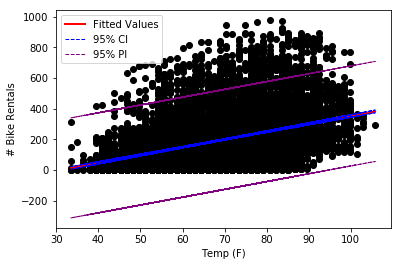

In [13]:
#Count v Temp
scatterPlot(tempData, countData, smlModel_CvT, "Temp (F)")

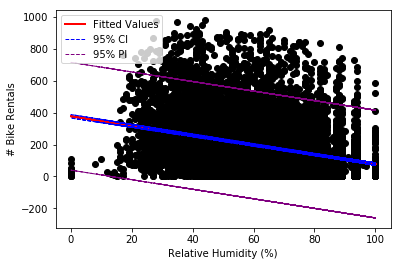

In [14]:
#Count v Humidity
scatterPlot(humidityData, countData, smlModel_CvH, "Relative Humidity (%)")

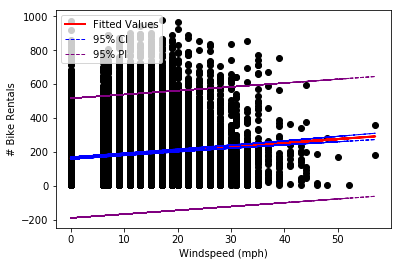

In [15]:
#Count v Windspeed
scatterPlot(windspeedData, countData, smlModel_CvW, "Windspeed (mph)")

e) Using your results from part (d) predict the number of bike rentals in hours for
which:
* i. the outside temperature is 70 degrees Fahrenheit
* ii. the wind speed is 10 miles per hour
* iii. the relative humidity is 40%

Be sure to accompany each point prediction with a 95% prediction interval.   

In [21]:
#i. temp = 70 F
tempPrediction = smlModel_CvT.predict({"temp": [70]})
ignore, tempLow, tempHigh = pi(smlModel_CvT, exog = [1,70], weights = 1)
print("Temp: ", [tempPrediction, tempLow, tempHigh])

Temp:  [0    199.646512
dtype: float64, array([-126.66870045]), array([525.96172448])]


$\hat{y}$ = -156.9856 + 5.0947(70)

Predicited # of bike rental when temp is 70 degrees Fahrenheit is about 200, with a 95% PI of (-126.67, 525.97)

In [17]:
#ii. windpseed = 10 mph
windspeedPredition = smlModel_CvW.predict({"windspeed": [10]})
ignore, windspeedLow, windspeedHigh = pi(smlModel_CvW, exog = [1,10], weights = 1)
print("Windspeed: ", [windspeedPredition, windspeedLow, windspeedHigh])

Windspeed:  [0    185.27813
dtype: float64, array([-168.00327181]), array([538.55953082])]


$\hat{y}$ = 162.7876 + 2.2491(10)

Predicited # of bike rental when windsped is 10 mph is about 185, with a 95% PI of (-168.00, 538.56)

In [18]:
#iii. humidity = 40
humidityPredition = smlModel_CvH.predict({"humidity": [40]})
ignore, humidityLow, humidHigh = pi(smlModel_CvH, exog = [1,40], weights = 1)
print("Humidity: ", [humidityPredition, humidLow, humidHigh])

Humidity:  [0    256.954865
dtype: float64, array([-79.81519026]), array([593.72492064])]


$\hat{y}$ = 376.4456 - 2.9873(40)

Predicited # of bike rental when relative humidity is 40% is about 257, with a 95% PI of (-79.82, 593.73)

f) Fit a linear regression model relating count to season using automated
functions. You must make sure that these functions treat season as a categorical
variable and not a numeric variable. In R this can be accomplished with:

lm(count~ factor(season), data = bike) (R)

or

smf.ols('count ~ C(season)', data = bike).fit( ) (Python3)

Carefully interpret each of the regression coefficients in this model. Using these
coefficients, calculate the expected number of bike rentals in each season.

In [19]:
seasonsModel = smf.ols('count ~ C(season)', data = data).fit()
seasonsModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     236.9
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          6.16e-149
Time:                        09:39:20   Log-Likelihood:                -71701.
No. Observations:               10886   AIC:                         1.434e+05
Df Residuals:                   10882   BIC:                         1.434e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        116.3433      3.387     34.352      0.000     109.704     122.982
C(season)[T.2]    98.9081      4.769     20.740      0.000      89.560     108.256
C(season)[T.3]   118.0739      4.769     24.758      0.000     108.726     127.422
C(season)[T.4]    82.6450      4.769     17.331      0.000      73.298      91.992
==============================================================================
Omnibus:                     1896.059   Durbin-Watson:                   0.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3190.509
Skew:                           1.156   Prob(JB):                         0.00
Kurtosis:                       4.299   Cond. No.                         4.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

${𝛽_{0}}$ is the expected # of bike rentals when season = 1 (Spring)

$\hat{𝛽_{0}}$ is estimated to be 116.3433

Spring: E[count|season=1] = ${𝛽_{0}}$ = 116.3433

${𝛽_{1}}$ is the expected difference in bike rentals in season = 2 (Summer) relative to season = 1 (Spring)

$\hat{𝛽_{1}}$ is estimated to be 98.9081

This means on average about 99 more bike rentals are expected to be rented out per hour in Summer relative to Spring.

Summer: E[count|season=2] = ${𝛽_{0}} + {𝛽_{1}} $ = 116.3433 + 98.9081 = 215.2514

${𝛽_{2}}$ is the expected difference in bike rentals in season = 3 (Fall) relative to season = 1 (Spring)

$\hat{𝛽_{2}}$ is estimated to be 118.0739

This means that about 118 more bikes are expected to be rented out per hour in the Fall relative to Spring.

Fall: E[count|season=3] = ${𝛽_{0}} + {𝛽_{2}} $ = 116.3433 + 118.0739 = 234.4172

${𝛽_{3}}$ is the expected change in bike rentals in season = 4 (Winter) relative to season = 1 (Spring)

$\hat{𝛽_{3}}$ is the estimated to be 82.6450

This means thatabout 83 more bikes are expected to be rented out per hour in the Winter relative to Spring.

Winter: E[count|season=4] = ${𝛽_{0}} + {𝛽_{3}} $ = 116.3433 + 82.6450 = 198.9883

g) Fit a linear regression model relating count to weather using automated
functions. As in part (g) make sure that these functions treat weather as a
categorical variable and not a numeric variable. Carefully interpret each of the
regression coefficients in this model. Using these coefficients, calculate the
expected number of bike rentals in each weather category.

In [20]:
seasonsModel = smf.ols('count ~ C(weather)', data = data).fit()
seasonsModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     65.53
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           5.48e-42
Time:                        09:39:20   Log-Likelihood:                -71948.
No. Observations:               10886   AIC:                         1.439e+05
Df Residuals:                   10882   BIC:                         1.439e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         205.2368      2.117     96.936      0.000     201.087     209.387
C(weather)[T.2]   -26.2813      3.982     -6.599      0.000     -34.087     -18.475
C(weather)[T.3]   -86.3905      6.482    -13.328      0.000     -99.096     -73.685
C(weather)[T.4]   -41.2368    179.567     -0.230      0.818    -393.221     310.748
==============================================================================
Omnibus:                     2029.021   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3492.480
Skew:                           1.221   Prob(JB):                         0.00
Kurtosis:                       4.319   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

${𝛽_{0}}$ is the expected # of bike rentals when weather = 1 (Nice)

$\hat{𝛽_{0}}$ is estimated to be 205.2368

Nice: E[count|weather=1] = ${𝛽_{0}}$ = 205.2368

${𝛽_{1}}$ is the expected difference in bike rentals in weather = 2 (Cloudy) relative to weather = 1 (Nice)

$\hat{𝛽_{1}}$ is estimated to be -26.2813

This means on average about 26 fewer bike rentals are expected to be rented out per hour in Cloudy relative to Nice weather.

Cloudy: E[count|weather=2] = ${𝛽_{0}} + {𝛽_{1}} $ = 205.2368 - 26.2813 = 178.9555

${𝛽_{2}}$ is the expected difference in bike rentals in weather = 3 (Rainy) relative to weather = 1 (Nice)

$\hat{𝛽_{2}}$ is estimated to be -86.3905

This means that about 86 fewer bikes are expected to be rented out per hour in the Rainy relative to Nice weather.

Rainy: E[count|weather=3] = ${𝛽_{0}} + {𝛽_{2}} $ = 205.2368 - 86.3905 = 118.8463

${𝛽_{3}}$ is the expected change in bike rentals in season = 4 (Stormy) relative to season = 1 (Nice)

$\hat{𝛽_{3}}$ is the estimated to be -41.2368

This means thatabout 41 fewer bikes are expected to be rented out per hour in the Stormy relative to Nice weather.

Stormy: E[count|weather=4] = ${𝛽_{0}} + {𝛽_{3}} $ = 205.2368 - 41.2368 = 164